# Understand the Dataset

[kaggle Dataset](https://www.kaggle.com/datasets/waqi786/world-languages-dataset)

## Import libraries and dataset

In [1]:
# type: ignore
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import squarify

import warnings
warnings.filterwarnings('ignore')

## Dataset Description

This dataset provides a comprehensive overview of 500 languages spoken around the world. It captures essential linguistic features, including language families, geographical regions, writing systems, and the estimated number of native speakers. The dataset aims to highlight the rich diversity of languages and their cultural significance, offering valuable insights for linguists, researchers, and enthusiasts interested in global language distribution.

The dataset contains real and accurate records for 500 languages across different regions and linguistic families. It covers a diverse range of languages, from widely spoken ones like English and Mandarin to less commonly known languages. The data was meticulously compiled to reflect the authentic linguistic landscape and provide a valuable resource for language studies and cultural analysis.


In [2]:
df = pd.read_csv(r'C:\Users\Rudra\Downloads\Python Project\Python_Pandas_profiling\World_Languages_Analysis\languages_dataset.csv', encoding= 'unicode_escape')
df.head(2)

,Language,Family,Region,Speakers,Writing System,ISO Code
0,Yoruba,Indo-European,India,76000000,Latin,om
1,Southern Min,Indo-European,India,47000000,Latin,ru


In [3]:
print(df.size)
print(df.shape)

3000
(500, 6)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Language        500 non-null    object
 1   Family          500 non-null    object
 2   Region          500 non-null    object
 3   Speakers        500 non-null    int64 
 4   Writing System  500 non-null    object
 5   ISO Code        489 non-null    object
dtypes: int64(1), object(5)
memory usage: 23.6+ KB


In [5]:
df.describe(include='all')

,Language,Family,Region,Speakers,Writing System,ISO Code
count,500,500,500,5.000000e+02,500,489
unique,52,12,30,NaN,22,51
top,Persian,Indo-European,India,NaN,Latin,uz
freq,16,228,95,NaN,203,19
mean,NaN,NaN,NaN,9.840200e+07,NaN,NaN
std,NaN,NaN,NaN,1.414893e+08,NaN,NaN
min,NaN,NaN,NaN,2.000000e+07,NaN,NaN
25%,NaN,NaN,NaN,2.800000e+07,NaN,NaN
50%,NaN,NaN,NaN,5.350000e+07,NaN,NaN
75%,NaN,NaN,NaN,7.690000e+07,NaN,NaN


In [6]:
df.columns

Index(['Language', 'Family', 'Region', 'Speakers', 'Writing System',
       'ISO Code'],
      dtype='object')

| **Column**        | **Description**                                                                 |
|-------------------|---------------------------------------------------------------------------------|
| **Language**       | The name of the language (e.g., English, Mandarin).                             |
| **Family**         | The linguistic family to which the language belongs (e.g., Indo-European, Sino-Tibetan). |
| **Region**         | The primary geographical area where the language is spoken (e.g., Worldwide, China, India). |
| **Speakers**       | The estimated number of native speakers (e.g., 379 million, 918 million).       |
| **Writing System** | The writing system used for the language (e.g., Latin, Simplified Chinese).     |
| **ISO Code**       | The ISO 639-1 code for the language (e.g., en, zh).                             |


## Data Cleaning 

In [7]:
df.isnull().sum()

Language           0
Family             0
Region             0
Speakers           0
Writing System     0
ISO Code          11
dtype: int64

In [8]:
df.shape[0] - df['ISO Code'].value_counts().sum()

11

<Axes: >

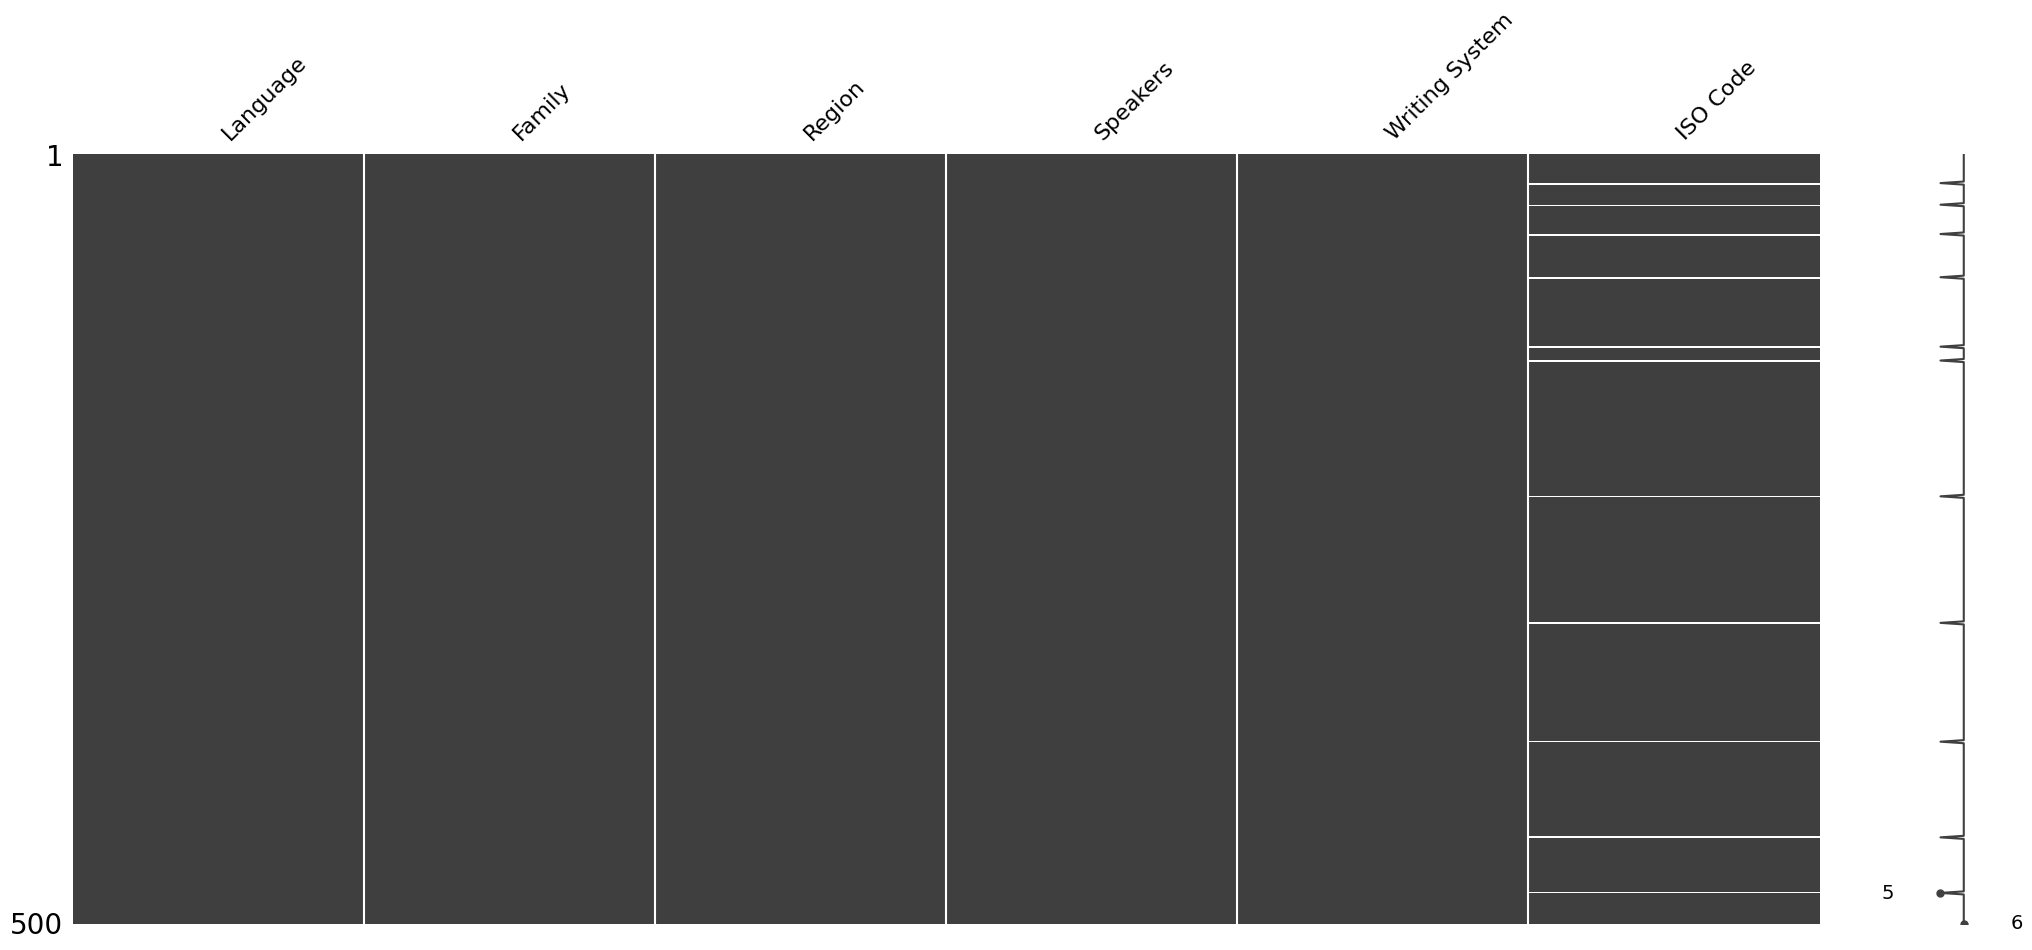

In [9]:
msno.matrix(df)

## Questions we Analysis

1. What are the top 10 languages by number of speakers?
2. How are languages distributed across different regions?
3. Which language families have the highest number of speakers?
4. How many languages are spoken in each region, and what is the average number of speakers per language in each region?
5. Are there any correlations between the number of speakers and the writing system used?
6. Which languages are missing ISO codes, and what percentage of the dataset do they represent?
7. What is the distribution of languages by writing system, and which writing systems are most commonly used?
8. How many languages have more than 1 million speakers?
9. What is the average number of speakers for languages that use the Latin writing system versus other writing systems?
10. Are there any significant differences in the number of speakers among languages from different families?

# EDA

#### 1. What are the top 10 languages by number of speakers?

In [10]:
df1 = df.groupby(['Language'], as_index=False)['Speakers'].sum().sort_values(by='Speakers', ascending=True)
df1.reset_index(drop=True)

,Language,Speakers
0,Turkish,262000000
1,Bhojpuri,293000000
2,Jin,327000000
3,Polish,341900000
4,Spanish,345800000
5,Tamil,365900000
6,German,411000000
7,Wu (Shanghainese),436000000
8,Urdu,439000000
9,Arabic,480000000


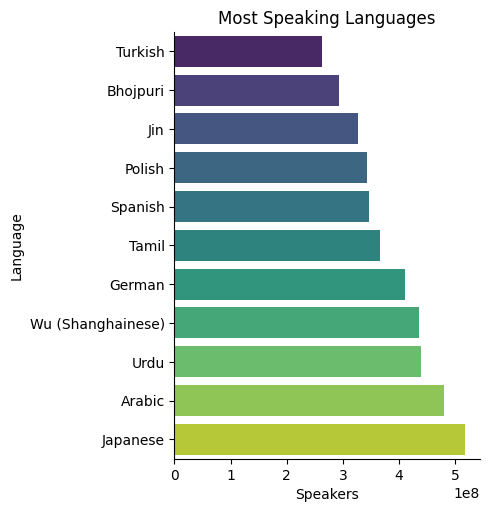

In [11]:
df2 = df.groupby(['Language'], as_index=False)['Speakers'].sum().sort_values(by='Speakers', ascending=True).head(11)

sns.catplot(
    kind='bar', 
    data=df2, 
    y='Language', 
    x='Speakers', 
    aspect=1,
    palette='viridis')

plt.title('Most Speaking Languages')
 
plt.show()


#### 2. How are languages distributed across different regions?

In [12]:
df22 = df.groupby(['Region'], as_index=False)['Language'].count().sort_values(by='Language', ascending=False)
df22 = df22.reset_index(drop=True)
df22

,Region,Language
0,India,95
1,China,63
2,Worldwide,32
3,Nigeria,27
4,"Pakistan, India",26
5,Indonesia,24
6,Ethiopia,19
7,"Germany, Austria",18
8,Uzbekistan,13
9,Turkey,13


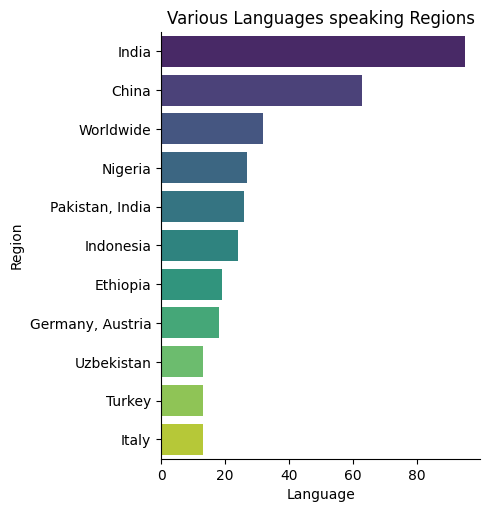

In [13]:
sns.catplot(
    data=df22.head(11),
    kind='bar',
    y='Region',
    x='Language',
    palette='viridis'
    
)

plt.title('Various Languages speaking Regions')
plt.show()

#### 3. Which language families have the highest number of speakers?

In [14]:
df3 = df.groupby(['Family'], as_index=False)['Speakers'].count().sort_values(by='Speakers', ascending=False)
df3 = df3.reset_index(drop=True)
df3

,Family,Speakers
0,Indo-European,228
1,Sino-Tibetan,76
2,Dravidian,36
3,Turkic,34
4,Afro-Asiatic,26
5,Austronesian,24
6,Niger-Congo,24
7,Indo-Iranian,16
8,Kra-Dai,12
9,Austroasiatic,10


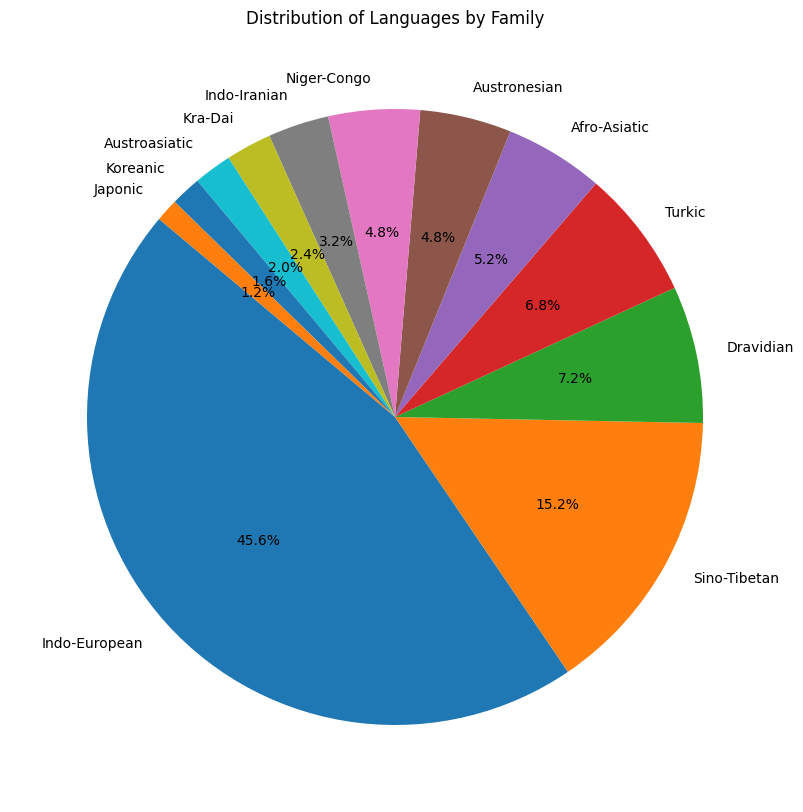

In [15]:
# Extract data for the pie chart
labels = df3['Family']  
sizes = df3['Speakers']  

plt.figure(figsize=(10, 10))

plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,

) 

plt.title('Distribution of Languages by Family')
plt.show()

#### 4. How many languages are spoken in each region, and what is the average number of speakers per language in each region?

In [16]:
df4_lan = df.groupby(['Region'], as_index=False)['Language'].count()
df4_lan.rename(columns={'Language':'Language Count'}, inplace=True)

df4_sp = df.groupby(['Region'], as_index=False)['Speakers'].apply(np.mean)
df4_sp.rename(columns={'Speakers':'Avg Speakers'}, inplace=True)

df4 = pd.merge(df4_lan, df4_sp, on='Region')
df4

,Region,Language Count,Avg Speakers
0,"Afghanistan, Pakistan",12,3.716667e+07
1,Azerbaijan,12,5.450000e+07
2,"Bangladesh, India",6,5.981667e+07
3,China,63,8.074603e+07
4,China (Hong Kong),6,2.450000e+08
5,Ethiopia,19,8.184211e+07
6,"Germany, Austria",18,1.355556e+08
7,India,95,1.191674e+08
8,"India, Pakistan",6,3.133333e+07
9,Indonesia,24,8.408333e+07


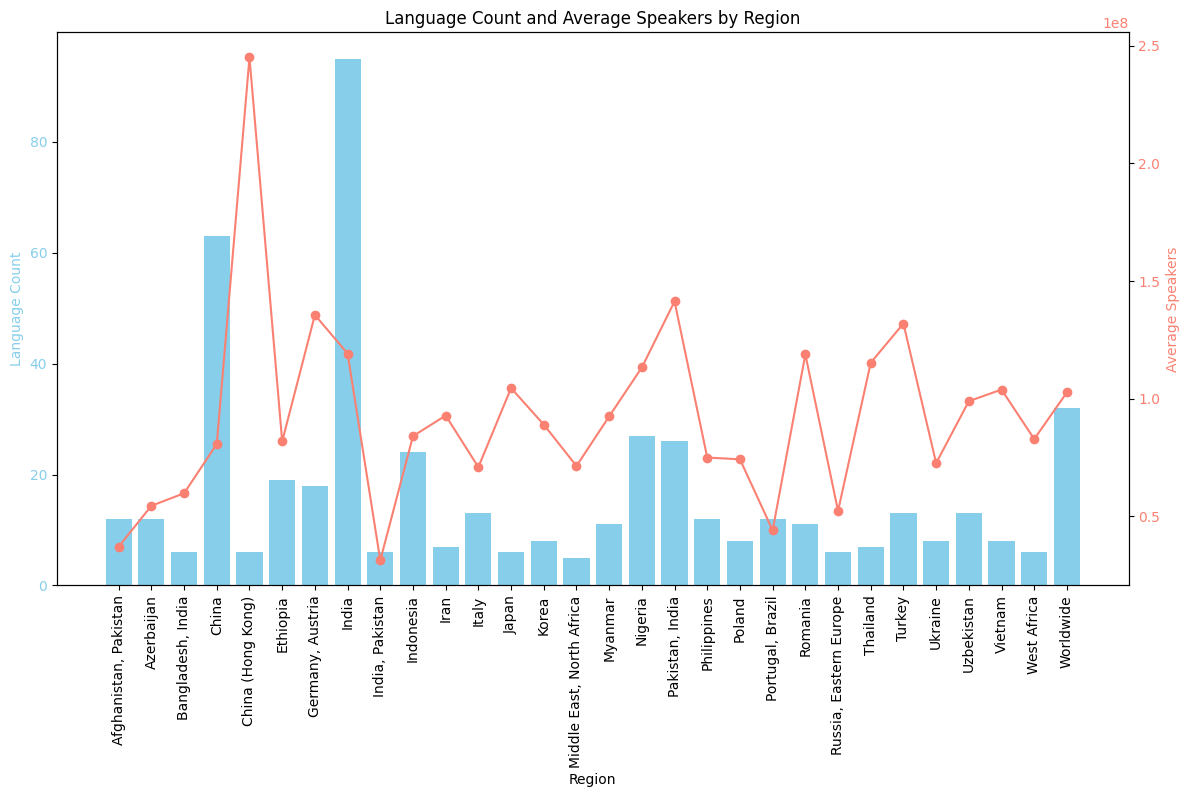

In [17]:
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plotting Language Count
ax1.bar(df4['Region'], df4['Language Count'], color='skyblue', label='Language Count')
ax1.set_xlabel('Region')
ax1.set_ylabel('Language Count', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
plt.xticks(rotation=90)

# Create a second y-axis for Average Speakers
ax2 = ax1.twinx()
ax2.plot(df4['Region'], df4['Avg Speakers'], color='salmon', marker='o', label='Avg Speakers')
ax2.set_ylabel('Average Speakers', color='salmon')
ax2.tick_params(axis='y', labelcolor='salmon')

fig.tight_layout()
plt.title('Language Count and Average Speakers by Region')
plt.show()


#### 5. Are there any correlations between the number of speakers and the writing system used?

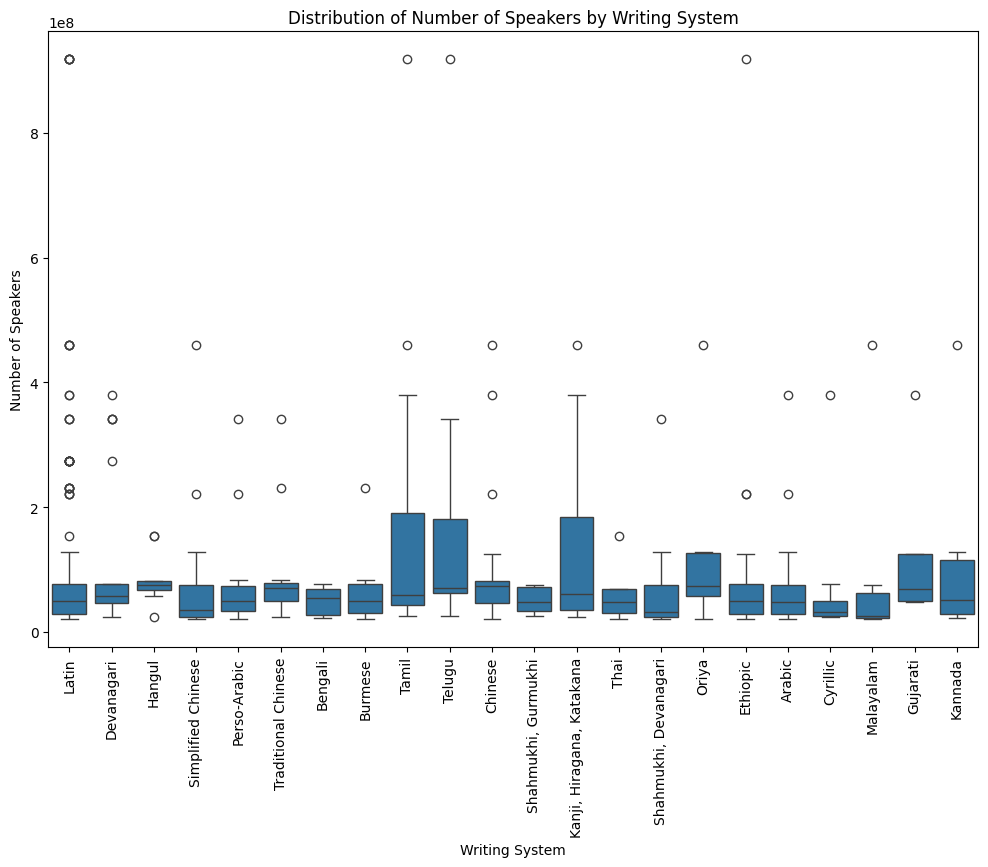

In [18]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Writing System', y='Speakers', data=df) 
plt.title('Distribution of Number of Speakers by Writing System')
plt.xlabel('Writing System')
plt.xticks(rotation=90)
plt.ylabel('Number of Speakers')
plt.show()

#### 6. Which languages are missing ISO codes, and what percentage of the dataset do they represent?

<Axes: >

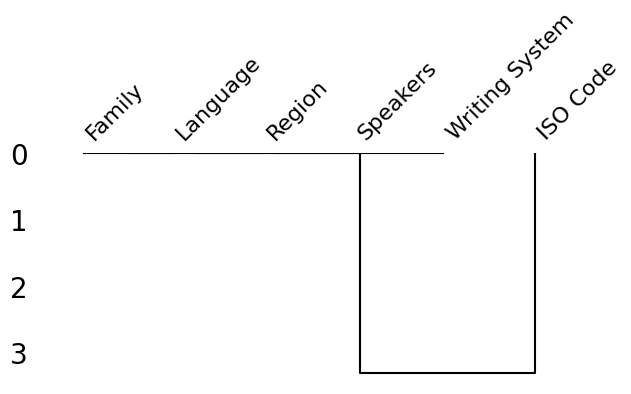

In [19]:
msno.dendrogram(df, figsize=(7,3))

In [20]:
df.isnull().sum()

Language           0
Family             0
Region             0
Speakers           0
Writing System     0
ISO Code          11
dtype: int64

In [21]:
df[df['ISO Code'].isnull()]

,Language,Family,Region,Speakers,Writing System,ISO Code
19,Burmese,Kra-Dai,"Russia, Eastern Europe",25000000,Traditional Chinese,NaN
33,Kannada,Afro-Asiatic,"India, Pakistan",50000000,Latin,NaN
52,Marathi,Austronesian,Italy,76900000,Latin,NaN
80,Korean,Niger-Congo,Poland,27000000,Latin,NaN
125,Javanese,Indo-European,China,25000000,Simplified Chinese,NaN
134,Romanian,Indo-European,India,22000000,Simplified Chinese,NaN
222,Amharic,Indo-European,"Afghanistan, Pakistan",47000000,Latin,NaN
304,Wu (Shanghainese),Indo-European,Ethiopia,69000000,Gujarati,NaN
381,Kannada,Afro-Asiatic,West Africa,21000000,Oriya,NaN
443,Southern Min,Indo-European,China (Hong Kong),221000000,Arabic,NaN


In [22]:
(df['ISO Code'].isnull().sum() / df.shape[0])*100

2.1999999999999997

#### 7. What is the distribution of languages by writing system, and which writing systems are most commonly used?

In [23]:
df7 = df.groupby(['Writing System'], as_index=False )['Speakers'].count().sort_values(by='Speakers', ascending=False)
df7 = df7.reset_index(drop=True)
df7

,Writing System,Speakers
0,Latin,203
1,Devanagari,28
2,Perso-Arabic,24
3,Arabic,21
4,Chinese,21
5,Traditional Chinese,20
6,Simplified Chinese,20
7,Cyrillic,19
8,Ethiopic,19
9,Tamil,16


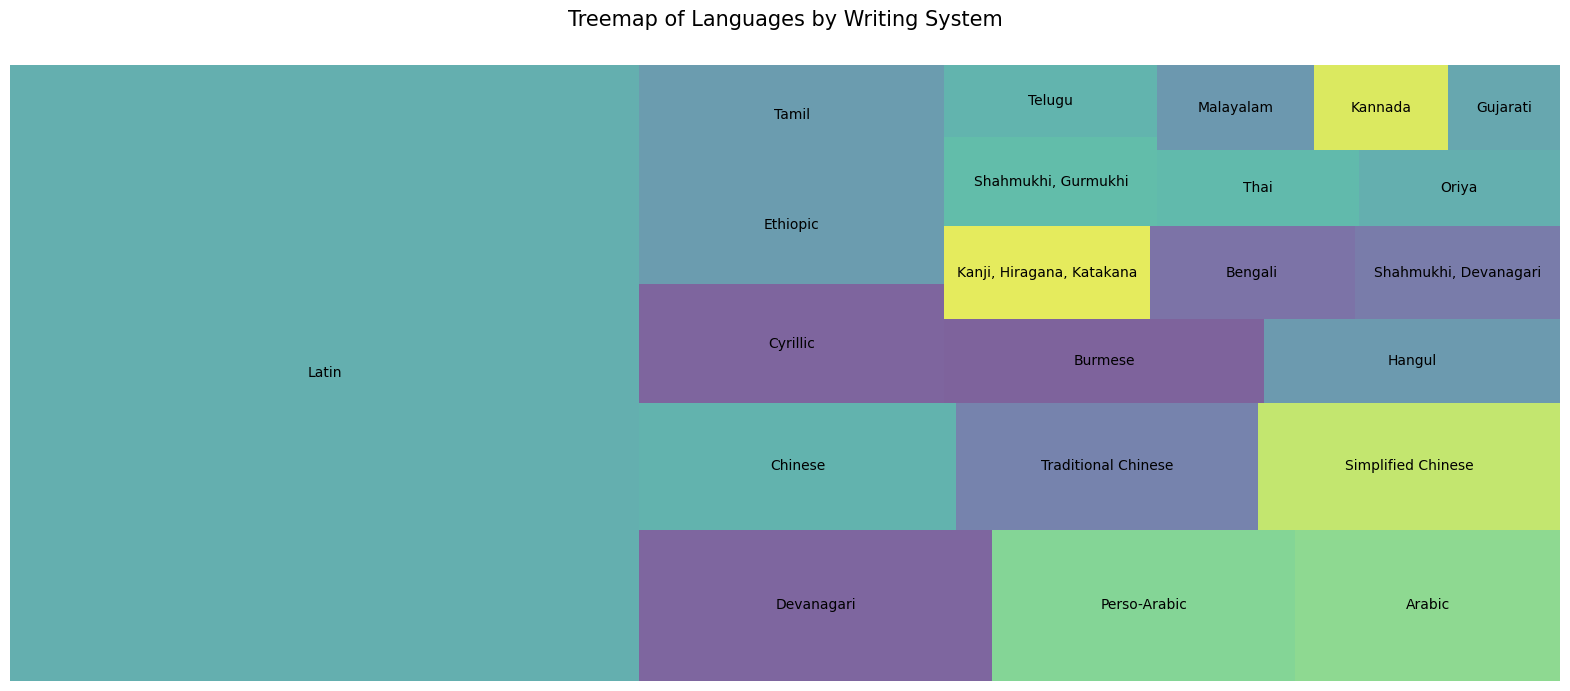

In [24]:
import squarify

plt.figure(figsize=(20, 8))
cmap = plt.get_cmap('Set3') 
squarify.plot(sizes=df7['Speakers'], label=df7['Writing System'], alpha=0.7)
plt.title('Treemap of Languages by Writing System',size=15, y=1.05)
plt.axis('off')  
plt.show()

#### 8. How many languages have more than 1 million speakers?

In [25]:
df8 = df.groupby(['Language'], as_index=False)['Speakers'].sum()
df8 = df8[df8['Speakers'] > 1000000]
df8.count()

Language    52
Speakers    52
dtype: int64

#### 9. What is the average number of speakers for languages that use the Latin writing system versus other writing systems?

In [26]:
df9_lan = df.groupby(['Language'], as_index=False)['Speakers'].mean()

df['Is_Latin'] = df['Writing System'] == 'Latin'
df9_latin = df.groupby(['Language'], as_index=False)['Is_Latin'].max()

df9 = pd.merge(df9_lan, df9_latin, on='Language')

# Compute averages for Latin and Non-Latin writing systems
avg_speakers_latin = df9[df9['Is_Latin']]['Speakers'].mean()
avg_speakers_non_latin = df9[~df9['Is_Latin']]['Speakers'].mean()

print(f"Average number of speakers for languages with Latin writing system: {avg_speakers_latin}")
print(f"Average number of speakers for languages with other writing systems: {avg_speakers_non_latin}")

Average number of speakers for languages with Latin writing system: 95468597.82646547
Average number of speakers for languages with other writing systems: 91125000.0


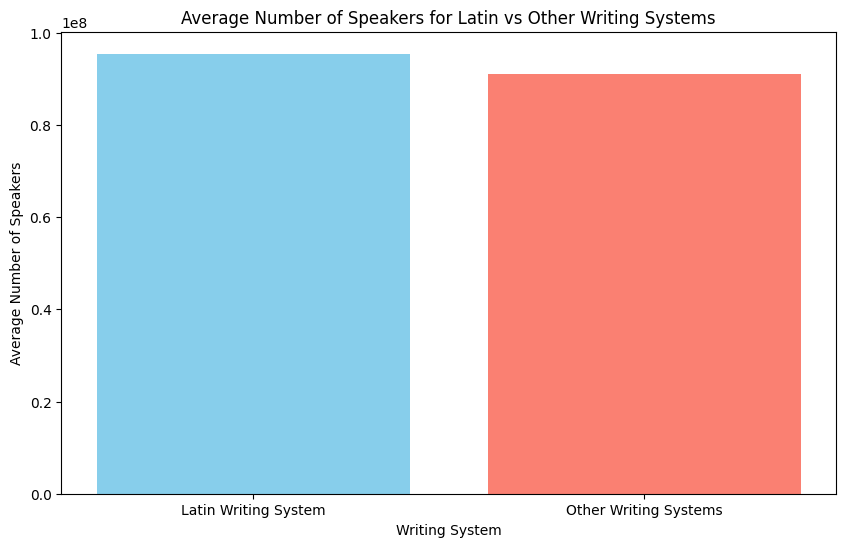

In [27]:
categories = ['Latin Writing System', 'Other Writing Systems']
averages = [avg_speakers_latin, avg_speakers_non_latin]

plt.figure(figsize=(10, 6))
plt.bar(categories, averages, color=['skyblue', 'salmon'])
plt.xlabel('Writing System')
plt.ylabel('Average Number of Speakers')
plt.title('Average Number of Speakers for Latin vs Other Writing Systems')
plt.show()


### 10. Are there any significant differences in the number of speakers among languages from different families?

In [28]:
df["Language"].unique()

array(['Yoruba', 'Southern Min', 'Yue (Cantonese)', 'Spanish', 'Arabic',
       'Awadhi', 'Wu (Shanghainese)', 'Javanese', 'Italian', 'German',
       'English', 'Romanian', 'Marathi', 'Malayalam', 'Bengali',
       'Bhojpuri', 'Ukrainian', 'Amharic', 'Burmese', 'Hausa',
       'Vietnamese', 'Pashto', 'Tamil', 'Japanese', 'Tagalog', 'Hakka',
       'Uzbek', 'Kannada', 'Maithili', 'Igbo', 'Xiang (Hunanese)',
       'Hindi', 'Jin', 'Korean', 'Persian', 'Urdu', 'Gujarati', 'Sindhi',
       'Fula', 'Oromo', 'Portuguese', 'Odia (Oriya)', 'Thai', 'Punjabi',
       'Sundanese', 'Telugu', 'Azerbaijani', 'Turkish', 'Mandarin',
       'Polish', 'Russian', 'French'], dtype=object)

In [29]:
df_family = df.groupby('Family', as_index=False)['Speakers'].agg(['mean', 'sum'])
df_family.reset_index(inplace=True)
df_family.columns = ['index', 'Family', 'Average Speakers', 'Total Speakers']
df_family.drop(columns={'index'}, inplace=True)
df_family


,Family,Average Speakers,Total Speakers
0,Afro-Asiatic,1.045385e+08,2718000000
1,Austroasiatic,2.065000e+08,2065000000
2,Austronesian,6.786667e+07,1628800000
3,Dravidian,7.305278e+07,2629900000
4,Indo-European,9.190132e+07,20953500000
5,Indo-Iranian,1.247438e+08,1995900000
6,Japonic,1.433333e+08,860000000
7,Koreanic,9.050000e+07,724000000
8,Kra-Dai,5.891667e+07,707000000
9,Niger-Congo,1.005417e+08,2413000000


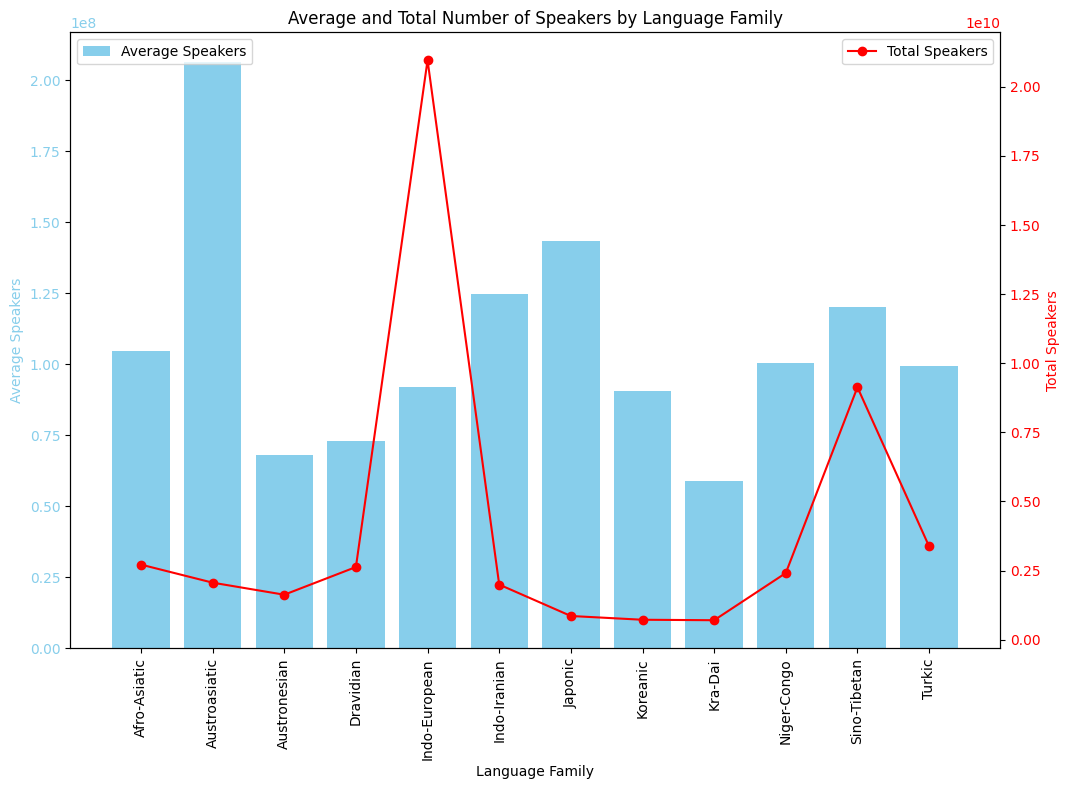

In [30]:
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar plot for Average Speakers
color = 'skyblue'
ax1.bar(df_family['Family'], df_family['Average Speakers'], color=color, label='Average Speakers')
ax1.set_xlabel('Language Family')
ax1.set_ylabel('Average Speakers', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')
plt.xticks(rotation=90)

# Line plot for Total Speakers
ax2 = ax1.twinx()  
color = 'red'
ax2.plot(df_family['Family'], df_family['Total Speakers'], color=color, marker='o', label='Total Speakers')
ax2.set_ylabel('Total Speakers', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

# Show the plot
plt.title('Average and Total Number of Speakers by Language Family')
plt.show()
